In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
import tensorflow as tf
# Number of available GPUs to tensorflow
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(
  mean=None,
  n_samples=N,
  n_features=2,
  n_classes=2,
  shuffle=True,
  random_state=None
)

X, Y = gaussian_quantiles

In [4]:
X.shape

(1000, 2)

In [5]:
Y.shape

(1000,)

In [6]:
Y = Y[:, np.newaxis]

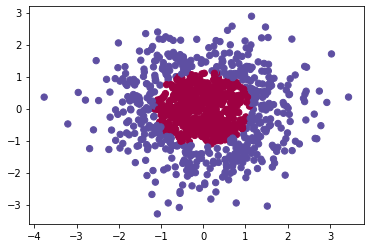

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

## Funciones de activacion

In [8]:
def sigmoid(x, derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x) + 1)**2)
  else:
    return 1 / (1 + np.exp(-x))


def relu(x, derivate=False):
  if derivate:
    x[x <= 0] = 0
    x[x > 0] = 1
    return x
  else:
    return np.maximum(0, x)


## Funciones de perdida

In [9]:
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)


In [10]:
def initialize_paramters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0, L -1):
    parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],
                                               layers_dim[l+1]))*2 - 1
    parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1]))*2 - 1
  return parameters


In [11]:
(np.random.rand(10, 3) * 2) -1

array([[ 0.39046867, -0.96487173, -0.54252899],
       [ 0.29744637, -0.37350388,  0.73662534],
       [-0.30559427,  0.30999055, -0.73841124],
       [-0.73964604, -0.61779043,  0.19656681],
       [-0.83188639, -0.20557194, -0.55944046],
       [-0.80297499,  0.02659499,  0.40192842],
       [ 0.50962285,  0.6990601 , -0.13409503],
       [-0.54311647, -0.52245234, -0.16006867],
       [-0.21676478, -0.43423896,  0.92795009],
       [ 0.34871839, -0.90451196,  0.57886766]])

In [18]:
layers_dim = [2,4,8,1]

params = initialize_paramters_deep(layers_dim)
print(params)

{'W1': array([[-0.3705025 , -0.94579862,  0.5733213 , -0.14810632],
       [ 0.6915801 ,  0.51788786, -0.73295769, -0.9575621 ]]), 'b1': array([[-0.81306486,  0.66830996,  0.66207929,  0.94088661]]), 'W2': array([[ 0.80493014, -0.3697451 ,  0.74221499, -0.77763326, -0.79378222,
         0.63359976, -0.7704184 , -0.945655  ],
       [ 0.65982868, -0.09946773, -0.43352168, -0.93802738, -0.72736726,
        -0.43897305, -0.56080055,  0.90373383],
       [-0.16208605, -0.44378507, -0.86146649,  0.84675826, -0.34660347,
         0.67323818, -0.21059645,  0.11480358],
       [ 0.11858955, -0.11598447,  0.94871782, -0.4737431 ,  0.59782673,
        -0.38115246,  0.91847181, -0.46891255]]), 'b2': array([[-0.27486405,  0.85188252, -0.65022928, -0.01587556, -0.01207905,
        -0.82338788, -0.04537987, -0.83807188]]), 'W3': array([[-0.82334691],
       [-0.22249854],
       [-0.57290741],
       [ 0.04315453],
       [-0.92084183],
       [ 0.34223257],
       [-0.28549904],
       [-0.55717529

## Entrenamiento forward de la red neuronal

forward busca realizar una prediccion

In [19]:
params['W1']

array([[-0.3705025 , -0.94579862,  0.5733213 , -0.14810632],
       [ 0.6915801 ,  0.51788786, -0.73295769, -0.9575621 ]])

In [20]:
params['W1'].shape

(2, 4)

In [16]:
X.shape

(1000, 2)

In [21]:
np.matmul(X,params['W1']).shape

(1000, 4)

In [25]:
np.matmul(X, params['W1'])


array([[ 0.35725939,  0.39386814, -0.41278225, -0.3696955 ],
       [ 0.55467922,  1.21130762, -0.80300403,  0.01930093],
       [-0.06691   , -0.49285489,  0.19058631, -0.34530669],
       ...,
       [ 1.10043238,  0.6410488 , -1.11680591, -1.70468237],
       [ 0.11182776, -0.22902856, -0.03397813, -0.46421694],
       [-0.24239405, -0.86771898,  0.44237392, -0.34314582]])

In [24]:
# en numpy es igual para realizar
# el producto punto una operacion con @ o np.matmul
X@params['W1']


array([[ 0.35725939,  0.39386814, -0.41278225, -0.3696955 ],
       [ 0.55467922,  1.21130762, -0.80300403,  0.01930093],
       [-0.06691   , -0.49285489,  0.19058631, -0.34530669],
       ...,
       [ 1.10043238,  0.6410488 , -1.11680591, -1.70468237],
       [ 0.11182776, -0.22902856, -0.03397813, -0.46421694],
       [-0.24239405, -0.86771898,  0.44237392, -0.34314582]])

In [26]:
params
# entrada
params['A0'] = X
# multiplicacion de matrices mas el bias
params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
# el resultado se pasa por la funcion de activacion
params['A1'] = relu(params['Z1'])


params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
params['A2'] = relu(params['Z2'])

params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
# se usa sigmoid porque quiero que el resultado final sea la distribucion
# estadistica entre una clase y otra
params['A3'] = sigmoid(params['Z3'])

output = params['A3']

In [40]:
# las predicciones iniciales son muy erradas porque nos basamos en valores aleatorios
output[:10]

array([[0.62029647],
       [0.43790701],
       [0.70097887],
       [0.32163982],
       [0.28143514],
       [0.21321039],
       [0.45818549],
       [0.31063883],
       [0.44135041],
       [0.65350206]])

In [30]:
output.shape


(1000, 1)

## Aplicando backpropagation y descenso del gradiente

backpropagation distribuye el error por toda la red neuronal

In [42]:
# backpropagation

params['dZ3'] = mse(Y, output, True) * sigmoid(params['A3'], True)
# con la traspuesta para poder hacer la operacion
params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])


# como ya no es la ultima capa el backpropagation se hace diferente
params['dZ2'] = np.matmul(
    params['dZ3'], params['W3'].T) * relu(params['A2'], True)
params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

params['dZ1'] = np.matmul(
    params['dZ2'], params['W2'].T) * relu(params['A1'], True)
params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])


In [33]:
params['dZ3'].shape


(1000, 1)

In [34]:
params['A2'].shape

(1000, 8)

In [35]:
params['A2'].T.shape


(8, 1000)

In [37]:
params['dW3'].shape

(8, 1)

## Gradient descent

El gradient descent se utiliza para actualizar los pesos y bias de la red


In [43]:
# Gradient descent
# el  0.0001  es el learning rate
params['W3'] = params['W3'] - params['dW3'] * 0.0001
# en algunos casos se usa la media en otros al suma
# lo que se busca es reducirlo a un valor
params['b3'] = params['b3'] - \
    np.mean(params['dW3'], axis=0, keepdims=True) * 0.0001


params['W2'] = params['W2'] - params['dW2'] * 0.0001
params['b2'] = params['b2'] - \
    np.mean(params['dW2'], axis=0, keepdims=True) * 0.0001

params['W1'] = params['W1'] - params['dW1'] * 0.0001
params['b1'] = params['b1'] - \
    np.mean(params['dW1'], axis=0, keepdims=True) * 0.0001




In [44]:
def train(x_data, lr, params, training=True):
  """
  x_data: datos de entrada \n
  lr: learning rate\n
  params: parametros \n
  training=True : esta en modo de entrenamiento \n
  """

  # Forward
  params['A0'] = X
  params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
  params['A1'] = relu(params['Z1'])


  params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
  params['A2'] = relu(params['Z2'])

  params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
  params['A3'] = sigmoid(params['Z3'])

  output = params['A3']

  if training:
    # Backpropagation
    params['dZ3'] = mse(Y, output, True) * sigmoid(params['A3'], True)
    params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

    params['dZ2'] = np.matmul(
        params['dZ3'], params['W3'].T) * relu(params['A2'], True)
    params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

    params['dZ1'] = np.matmul(
        params['dZ2'], params['W2'].T) * relu(params['A1'], True)
    params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

    # Gradient descent
    params['W3'] = params['W3'] - params['dW3'] * lr
    params['b3'] = params['b3'] - \
        np.mean(params['dW3'], axis=0, keepdims=True) * lr


    params['W2'] = params['W2'] - params['dW2'] * lr
    params['b2'] = params['b2'] - \
        np.mean(params['dW2'], axis=0, keepdims=True) * lr

    params['W1'] = params['W1'] - params['dW1'] * lr
    params['b1'] = params['b1'] - \
        np.mean(params['dW1'], axis=0, keepdims=True) * lr




  return output
